# The `m = n` Anomaly With Even a Little Error

  * John Mount
  * [Win Vector LLC](https://www.win-vector.com)
  * 4-April-2024

## Introduction

We show the `m = n` anomaly occurs with even little error a strong signal to noise ratio.

In [1]:
# import our modules and packages
import numpy as np
import pandas as pd
from overfit_fns import (
    run_training_size_modeling_experiments,
    plot_error_curves,
)
from plotnine import geom_vline

In [2]:
# initialize pseudo random generator
rng = np.random.default_rng(2018)

In [3]:
# pick example parameters
var_strength = 10.0
n_parameters = 20

In [4]:
# our synthetic data generation process
def mk_data(
        m_row: int,
        n_variables: int,
    ):
    y = rng.normal(0, 1, m_row)
    df = dict()
    for i in range(n_variables):
        var_name = "var_" + str(i).zfill(4)
        df[var_name] = rng.normal(0, 1, m_row)
        y = y + var_strength * df[var_name]
    df['y'] = y
    return pd.DataFrame(df)


In [5]:
# our large test data set we use to
# estimate true model quality
# in practice we often can not estimate
# true model quality so simply
# (must simulate using some training data 
# as hold out or cross validation methods.)
d_large_ideal_test = mk_data(100000, n_parameters)


In [6]:

# expected root mean square error
# of the model that always predicts zero
# a "null" or straw man to measure our performance
# relative to.
# as our data process outcome is mean zero, this
# is a non-silly basic estimate.
rmse_null = np.sqrt(1.0 + var_strength**2 * n_parameters)

# expected root mean square error of a perfect
# model. this is the magnitude of the unexplainable
# variance in the data generation process.
rmse_perfect = 1.0

In [7]:
# run all of the simulations or experiments
plot_frame = run_training_size_modeling_experiments(
    cache_file_name='strong_signal_example.parquet',
    d_large_ideal_test=d_large_ideal_test,
    example_factory=mk_data,
    rng=rng,
    rmse_null=rmse_null,
    rmse_perfect=rmse_perfect,
    n_repetitions=100,
    param_excess=3,
    alphas = [0.0],
)

In [8]:
# show an excerpt
plot_frame

,training rows,n variables,n parameters,alpha,measurement,value,L2 regularization,rmse_null,rmse_perfect
0,1,20,20,0.0,RMSE train,0.000000e+00,0.0,44.732538,1.0
1,1,20,20,0.0,RMSE train adjusted,inf,0.0,44.732538,1.0
2,1,20,20,0.0,RMSE train cross,7.728737e+01,0.0,44.732538,1.0
3,1,20,20,0.0,RMSE ideal test,4.084469e+01,0.0,44.732538,1.0
0,2,20,20,0.0,RMSE train,1.004859e-14,0.0,44.732538,1.0
...,...,...,...,...,...,...,...,...,...
3,59,20,20,0.0,RMSE ideal test,1.299752e+00,0.0,44.732538,1.0
0,60,20,20,0.0,RMSE train,7.673191e-01,0.0,44.732538,1.0
1,60,20,20,0.0,RMSE train adjusted,9.397701e-01,0.0,44.732538,1.0
2,60,20,20,0.0,RMSE train cross,1.189464e+00,0.0,44.732538,1.0


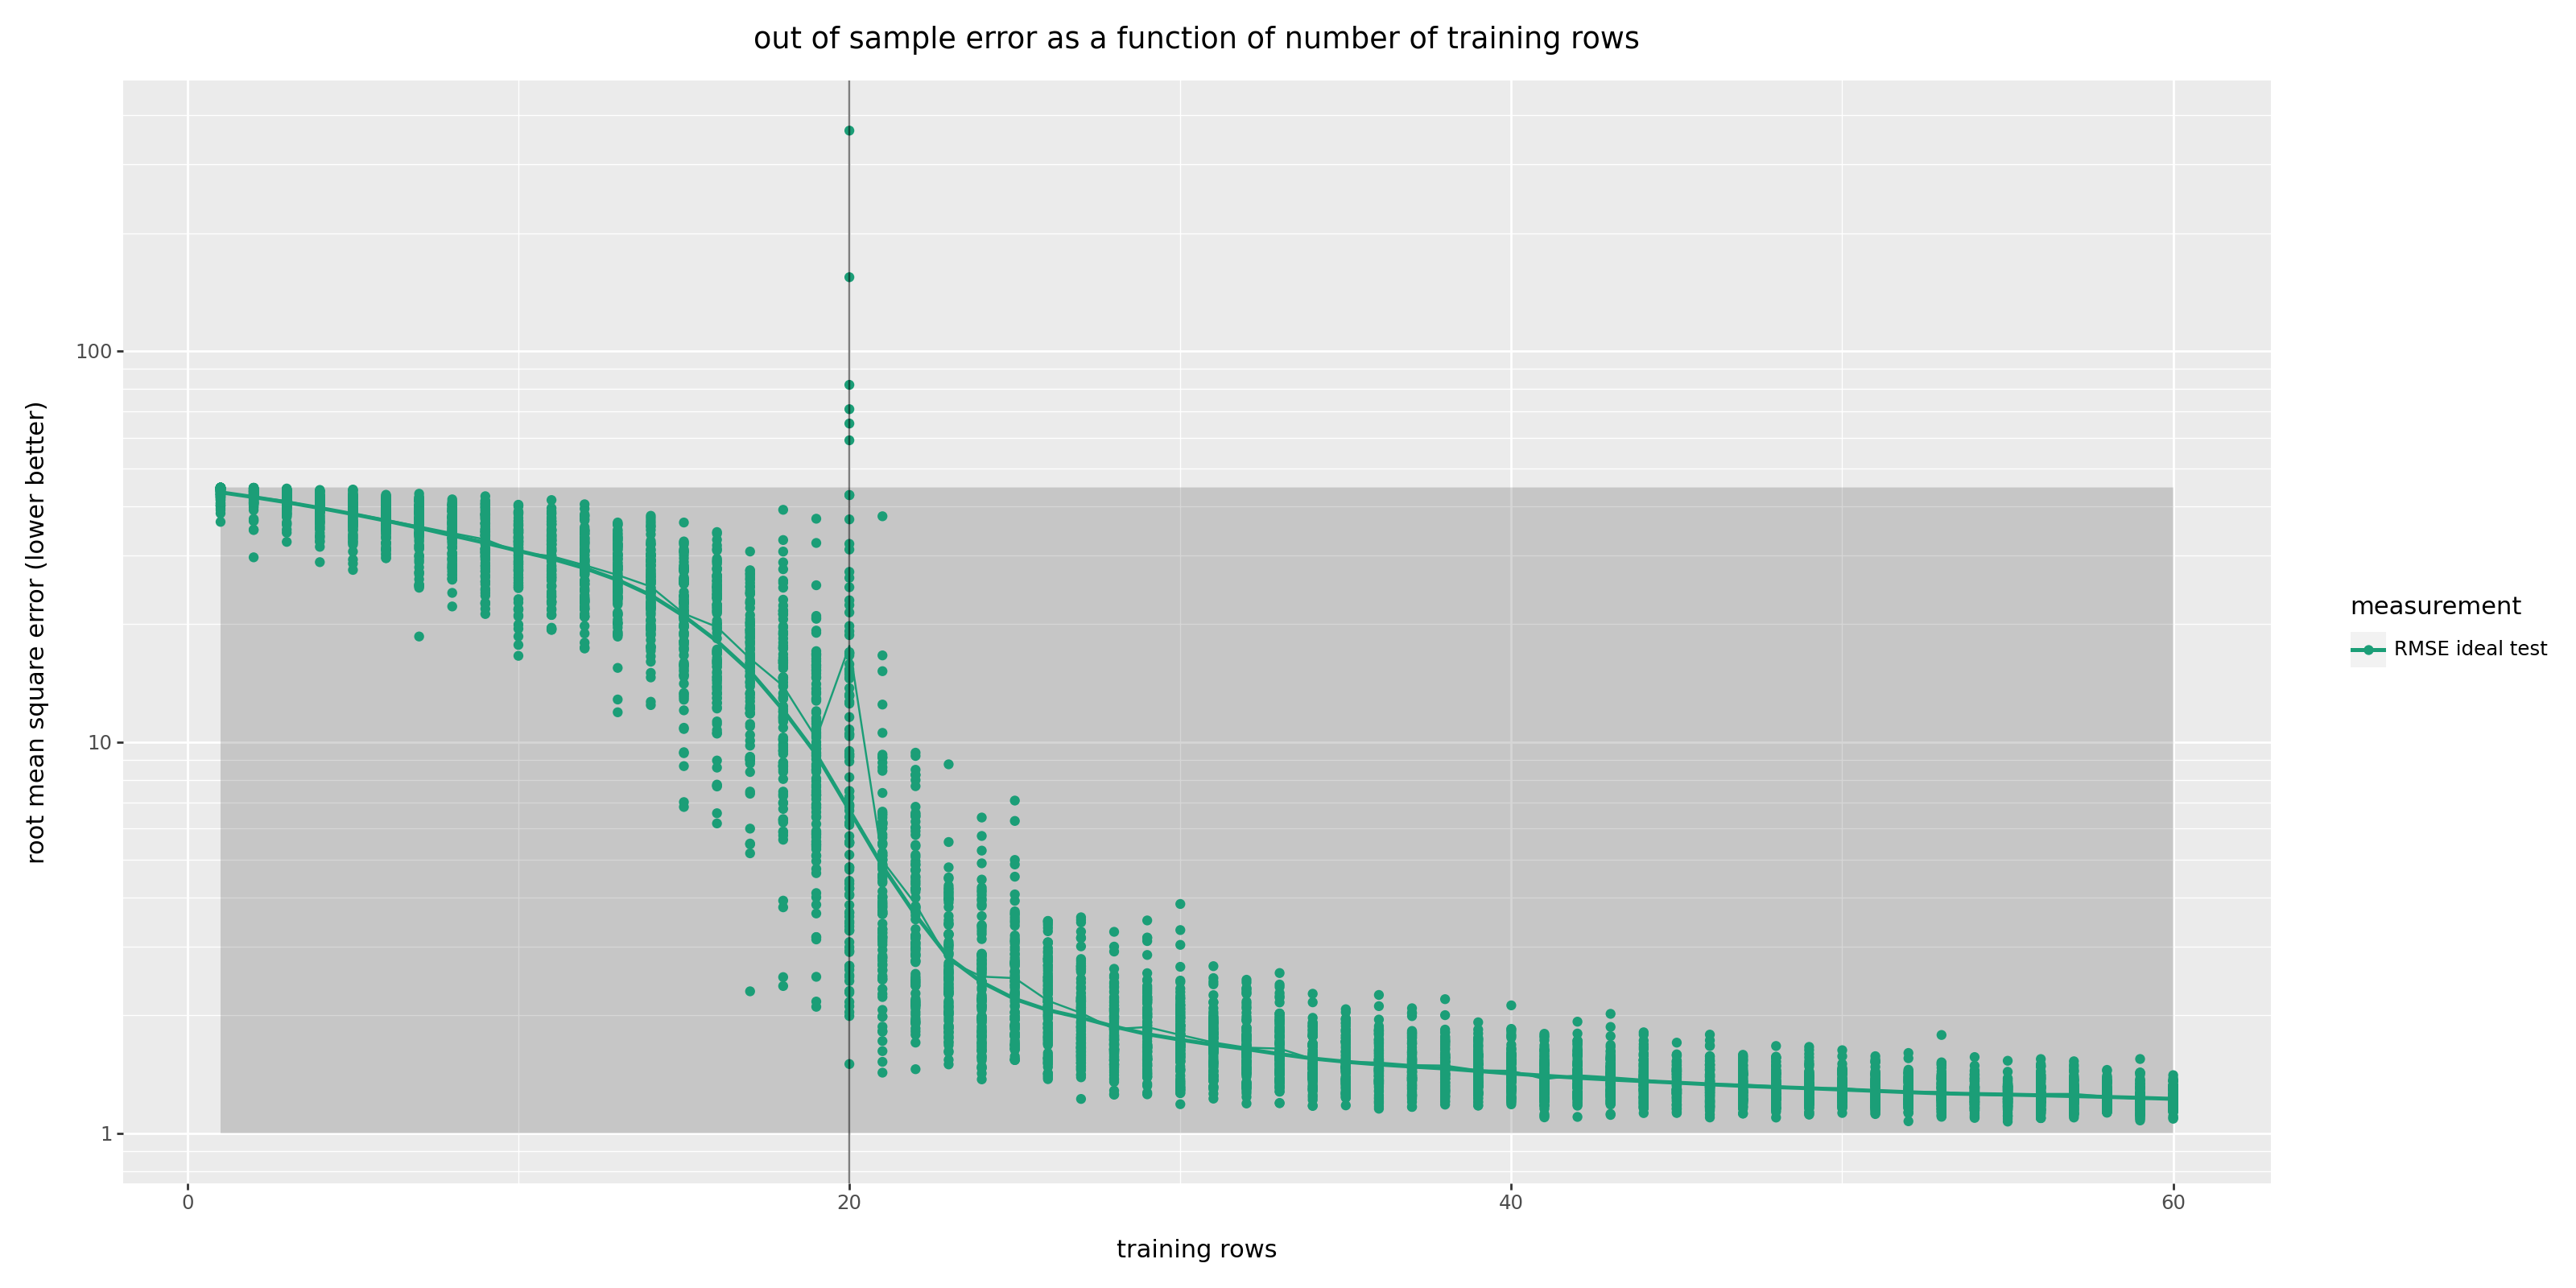

In [9]:
alpha_min = np.min(plot_frame['alpha'])
plot_error_curves(
    plot_frame.loc[
        (plot_frame['measurement'] == 'RMSE ideal test')
        ,:
    ],
    draw_lines=True,
    line_function="mean",
    draw_smooth=True,
    alpha_adjust=False,
    title="out of sample error as a function of number of training rows",
    log_scale_y=True,
    ) + geom_vline(xintercept=n_parameters, alpha=0.5)

All code and data for this article can be found [here](https://github.com/WinVector/Examples/tree/main/TrainingSetSize).

Copyright &copy; 2018-2024 Win-Vector LLC.  All rights reserved. [http://www.win-vector.com](http://www.win-vector.com)


